In [1]:
#Import File
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sumitkumerdas","key":"77a496173a17b11af524e87b2f18a685"}'}

In [2]:
#Move kaggle.json to the right location
!mkdir -p ~/.kaggle

In [3]:
!cp 'kaggle.json' ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/'kaggle.json' #The chmod 600 sets proper permissions so Kaggle API accepts it.

In [5]:
#Install the Kaggle API
!pip install kaggle

In [6]:
#Download a dataset from Kaggle
!kaggle datasets download -d sumitkumerdas/fresh-rotten-and-formalin-mixed-fruit-detection

Dataset URL: https://www.kaggle.com/datasets/sumitkumerdas/fresh-rotten-and-formalin-mixed-fruit-detection
License(s): unknown
 96% 820M/856M [00:04<00:00, 125MB/s]
100% 856M/856M [00:04<00:00, 192MB/s]


In [7]:
#Unzip the dataset
!unzip fresh-rotten-and-formalin-mixed-fruit-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63704.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63705.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63706.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63707.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63708.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63709.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63710.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63711.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63712.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63713.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63714.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63715.jpg  
  inflating: Fruits Origi

In [8]:
#Check the files in your working directory
import os
os.listdir()

['.config',
 'fresh-rotten-and-formalin-mixed-fruit-detection.zip',
 'Fruits Original-ML-GRP-07',
 'kaggle.json',
 'sample_data']

In [9]:
#This will list all files inside that folder.
import os
os.listdir("Fruits Original-ML-GRP-07")

['Orange', 'Banana', 'Grape', 'desktop.ini', 'Apple', 'Mango']

In [10]:
#Image Classification
import tensorflow as tf

data_dir = "Fruits Original-ML-GRP-07"

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(128, 128),  # resize all images
    batch_size=32           # number of images per batch
)

class_names = dataset.class_names
print("Classes:", class_names)


Found 10153 files belonging to 5 classes.
Classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']


In [11]:
#Load and prepare dataset
import tensorflow as tf

# Path to your dataset folder
data_dir = "Fruits Original-ML-GRP-07"

# Load dataset from folders (80% training, 20% validation)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,                # ensures reproducibility
    image_size=(128, 128),   # resize all images
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Show class names
class_names = train_ds.class_names
print("Detected Classes:", class_names)


# Normalize pixel values (0-255 → 0-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

Found 10153 files belonging to 5 classes.
Using 8123 files for training.
Found 10153 files belonging to 5 classes.
Using 2030 files for validation.
Detected Classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']


In [12]:
#Build a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 100s 368ms/step - accuracy: 0.6840 - loss: 1.0468 - val_accuracy: 0.9232 - val_loss: 0.1991
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 91s 360ms/step - accuracy: 0.9455 - loss: 0.1533 - val_accuracy: 0.9645 - val_loss: 0.0918
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 90s 355ms/step - accuracy: 0.9757 - loss: 0.0717 - val_accuracy: 0.9502 - val_loss: 0.1347
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 87s 344ms/step - accuracy: 0.9815 - loss: 0.0509 - val_accuracy: 0.9645 - val_loss: 0.0955
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 90s 355ms/step - accuracy: 0.9750 - loss: 0.0755 - val_accuracy: 0.9739 - val_loss: 0.0823
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 88s 346ms/step - accuracy: 0.9945 - loss: 0.0190 - val_accuracy: 0.9700 - val_loss: 0.0820
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 91s 360ms/step - accuracy: 0.9891 - loss: 0.0291 - val_accuracy: 0.9714 - val_loss: 0.0960
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 91s 359ms/step - accuracy: 0.9895 - loss: 

In [14]:
#Evaluate the model
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc*100:.2f}%")

64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.9895 - loss: 0.0412
Validation Accuracy: 99.06%


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 91s 359ms/step - accuracy: 1.0000 - loss: 9.6812e-04 - val_accuracy: 0.9867 - val_loss: 0.0437
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 88s 346ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9187 - val_loss: 0.2380
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 87s 343ms/step - accuracy: 0.9855 - loss: 0.0419 - val_accuracy: 0.9719 - val_loss: 0.0890
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 87s 344ms/step - accuracy: 0.9947 - loss: 0.0195 - val_accuracy: 0.9581 - val_loss: 0.1742
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 88s 346ms/step - accuracy: 0.9900 - loss: 0.0318 - val_accuracy: 0.9862 - val_loss: 0.0574
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 88s 348ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9892 - val_loss: 0.0508
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 141s 346ms/step - accuracy: 1.0000 - loss: 8.2873e-04 - val_accuracy: 0.9901 - val_loss: 0.0526
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 88s 345ms/step - accuracy: 1.0000 

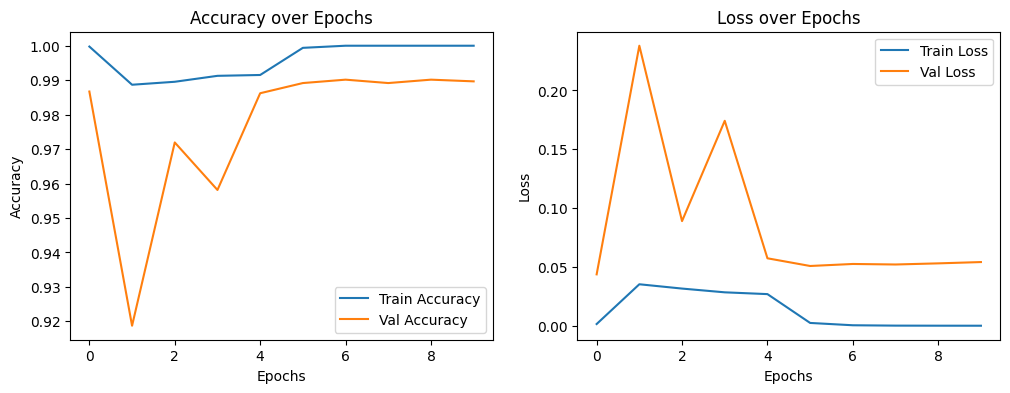

In [15]:
# Train with history tracking
import matplotlib.pyplot as plt

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Plot accuracy & loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [16]:
import os
os.listdir("Fruits Original-ML-GRP-07/Apple")

['Formalin-mixed', 'desktop.ini', 'Rotten', 'Fresh']

In [17]:
import os
os.listdir("Fruits Original-ML-GRP-07/Apple/Fresh")

['msg5170347760-65682.jpg',
 'WhatsApp Image 2024-06-21 at 11.09.30 PM (1).jpeg',
 'msg5170347760-66197.jpg',
 'IMG-20240612-WA0052.jpg',
 'msg5170347760-65661.jpg',
 'WhatsApp Image 2024-06-22 at 10.44.33 PM (1).jpeg',
 'WhatsApp Image 2024-06-22 at 10.44.39 PM.jpeg',
 'msg5170347760-69594.jpg',
 'WhatsApp Image 2024-06-22 at 10.44.26 PM (1).jpeg',
 'msg5170347760-65663.jpg',
 'WhatsApp Image 2024-06-21 at 11.09.31 PM.jpeg',
 'msg5170347760-68612.jpg',
 'msg5170347760-69554.jpg',
 'msg5170347760-68593.jpg',
 'msg5170347760-65720.jpg',
 'msg5170347760-69532.jpg',
 'msg5170347760-65685.jpg',
 'msg5170347760-66142.jpg',
 'msg5170347760-65664.jpg',
 'WhatsApp Image 2024-06-21 at 11.09.28 PM.jpeg',
 'msg5170347760-69491.jpg',
 'msg5170347760-63153.jpg',
 'WhatsApp Image 2024-06-21 at 11.09.23 PM.jpeg',
 'msg5170347760-69525.jpg',
 'IMG-20240612-WA0031.jpg',
 'msg5170347760-69555.jpg',
 'msg5170347760-68591.jpg',
 'msg5170347760-65657.jpg',
 'msg5170347760-69501.jpg',
 'msg5170347760-66139.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
Predicted Class: Apple (99.97% confidence)


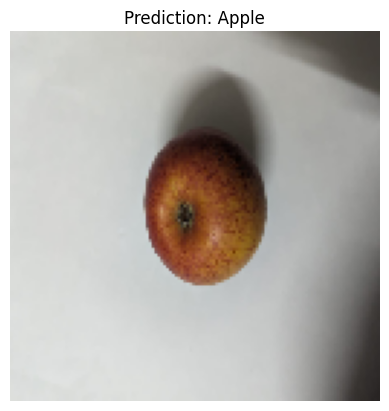

In [18]:
#Test on a single image
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Path to any image in your dataset
img_path = "Fruits Original-ML-GRP-07/Apple/Fresh/IMG-20240612-WA0078.jpg"  # change to your file

# Load & preprocess image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # batch dimension
img_array = img_array / 255.0  # normalize

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions) * 100

print(f"Predicted Class: {predicted_class} ({confidence:.2f}% confidence)")

# Show image
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()

In [19]:
#Install and Import Dependencies
!pip install torch torchvision lightly --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.3/859.3 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.6/165.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.2/828.2 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 64.3 MB/s eta 0:00:00


In [20]:
import os
import shutil

# Path to the .ipynb_checkpoints directory
checkpoints_dir = "Fruits Original-ML-GRP-07/.ipynb_checkpoints"

# Check if the directory exists before attempting to remove it
if os.path.exists(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)
    print(f"Removed directory: {checkpoints_dir}")
else:
    print(f"Directory not found: {checkpoints_dir}")

Directory not found: Fruits Original-ML-GRP-07/.ipynb_checkpoints


In [21]:
import lightly.models.utils as lightly_utils
print(dir(lightly_utils))

['CrossMapLRN2d', 'Dict', 'GroupNorm', 'Identity', 'Iterable', 'LayerNorm', 'List', 'LocalResponseNorm', 'Module', 'Optional', 'Parameter', 'Sequential', 'StochasticDepth', 'TYPE_CHECKING', 'Tensor', 'Tuple', 'Type', 'Union', '_NORM_LAYERS', '_NormBase', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_mask_reduce', '_mask_reduce_batched', '_no_grad_trunc_normal', 'activate_requires_grad', 'add_stochastic_depth_to_blocks', 'annotations', 'apply_masks', 'batch_shuffle', 'batch_shuffle_distributed', 'batch_unshuffle', 'batch_unshuffle_distributed', 'concat_all_gather', 'deactivate_requires_grad', 'dependency', 'dist', 'expand_index_like', 'functional', 'get_1d_sine_cosine_positional_embedding_from_positions', 'get_2d_sincos_pos_embed', 'get_2d_sine_cosine_positional_embedding', 'get_2d_sine_cosine_positional_embedding_from_grid', 'get_at_index', 'get_named_leaf_modules', 'get_weight_decay_parameters', 'init', 'initialize_2d_sine_

In [22]:
#Prepare Dataset (Unlabeled for Pretraining)
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Data augmentations for SimCLR
simclr_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=128),
    transforms.RandomHorizontalFlip(),
    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(), # Added ToTensor() here
])

# Custom function to check if a file is a valid image and not in .ipynb_checkpoints
def is_valid_image_file(path):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')
    return os.path.isfile(path) and path.lower().endswith(valid_extensions) and '.ipynb_checkpoints' not in path

# Load dataset without labels, using the custom check
dataset_unlabeled = datasets.ImageFolder(root="Fruits Original-ML-GRP-07", transform=simclr_transform, is_valid_file=is_valid_image_file)
dataloader_unlabeled = DataLoader(dataset_unlabeled, batch_size=64, shuffle=True, num_workers=2)

print(f"Found {len(dataset_unlabeled)} unlabeled images.")

Found 10153 unlabeled images.


In [23]:
#Define SimCLR Model
import torch
import torch.nn as nn
from lightly.models.modules import SimCLRProjectionHead
import torchvision.models as models # Import torchvision models

# Backbone (ResNet-18)
resnet = models.resnet18(pretrained=True) # Load pre-trained ResNet-18
backbone = nn.Sequential(*list(resnet.children())[:-1])  # remove classifier

# Projection head
# The input features to the projection head will be 512 for ResNet-18
projection_head = SimCLRProjectionHead(512, 512, 128)

# Full SimCLR model
class SimCLR(nn.Module):
    def __init__(self, backbone, projection_head):
        super().__init__()
        self.backbone = backbone
        self.projection_head = projection_head

    def forward(self, x):
        h = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(h)
        return z

model = SimCLR(backbone, projection_head)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]


In [24]:
#Loss & Optimizer
from lightly.loss import NTXentLoss

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

criterion = NTXentLoss(temperature=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [25]:
#Pretrain with SimCLR
import torch
import torch.nn.functional as F
import torchvision.transforms.v2 as T # Import torchvision.transforms.v2

# Simple NT-Xent loss implementation
def nt_xent_loss(z1, z2, temperature=0.5):
    # Normalize projections
    z1 = F.normalize(z1, dim=1)
    z2 = F.normalize(z2, dim=1)

    N = z1.size(0)
    z = torch.cat([z1, z2], dim=0)  # 2N x D
    sim = torch.matmul(z, z.T) / temperature  # 2N x 2N similarity matrix

    # Mask out self-similarity
    mask = torch.eye(2 * N, dtype=torch.bool, device=z.device)
    sim = sim.masked_fill(mask, -9e15)

    # Positive similarities (diagonals across halves)
    positives = torch.cat([torch.arange(N, 2 * N), torch.arange(0, N)], dim=0).to(z.device)
    loss = F.cross_entropy(sim, positives)
    return loss

# Example augmentation pipeline using v2
augment = T.Compose([
    T.RandomResizedCrop(128, scale=(0.2, 1.0)),
    T.RandomHorizontalFlip(),
    T.ColorJitter(0.4, 0.4, 0.4, 0.1), # ColorJitter works on tensors in v2
    T.RandomGrayscale(p=0.2),
])

# Pretrain with SimCLR
for epoch in range(10):
    total_loss = 0
    for (x, _) in dataloader_unlabeled:
        # Create two augmented views for each image
        # Augmentation is applied to PIL Images yielded by the DataLoader
        # x1 = torch.stack([augment(img) for img in x]) # Removed stacking here
        # x2 = torch.stack([augment(img) for img in x]) # Removed stacking here
        x1 = augment(x) # Applied augment directly to the batch
        x2 = augment(x) # Applied augment directly to the batch


        x1, x2 = x1.to(device), x2.to(device)

        # Forward pass through encoder+projection head
        z1, z2 = model(x1), model(x2)

        # Compute NT-Xent loss
        loss = nt_xent_loss(z1, z2, temperature=0.5)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader_unlabeled)
    print(f"Epoch [{epoch+1}/10] - Loss: {avg_loss:.4f}")

Epoch [1/10] - Loss: 3.3733
Epoch [2/10] - Loss: 3.2312
Epoch [3/10] - Loss: 3.1603
Epoch [4/10] - Loss: 3.1439
Epoch [5/10] - Loss: 3.1158
Epoch [6/10] - Loss: 3.1060
Epoch [7/10] - Loss: 3.0809
Epoch [8/10] - Loss: 3.1004
Epoch [9/10] - Loss: 3.0798
Epoch [10/10] - Loss: 3.0801


In [26]:
#Fine-tuning for Classification
from torch.utils.data import random_split

# Data for classification (with labels)
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset_labeled = datasets.ImageFolder(root="Fruits Original-ML-GRP-07", transform=train_transform)

# Split into train/test sets (80/20)
train_size = int(0.8 * len(dataset_labeled))
test_size = len(dataset_labeled) - train_size
train_dataset, test_dataset = random_split(dataset_labeled, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Classifier head
num_classes = len(dataset_labeled.classes)
classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(512, num_classes)  # 512 from ResNet backbone
)

# Combine backbone + classifier
model_finetune = nn.Sequential(
    backbone,  # pretrained backbone from SimCLR
    nn.Flatten(),
    classifier
).to(device)

# Freeze backbone parameters
for param in backbone.parameters():
    param.requires_grad = False

# Loss & optimizer
criterion_cls = nn.CrossEntropyLoss()
optimizer_cls = torch.optim.Adam(classifier.parameters(), lr=1e-3)


In [27]:
#Training the Classifier
# Training loop
for epoch in range(10):
    model_finetune.train()
    running_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer_cls.zero_grad()
        outputs = model_finetune(images)
        loss = criterion_cls(outputs, labels)
        loss.backward()
        optimizer_cls.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/10], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")


Epoch [1/10], Loss: 0.2961, Train Acc: 89.35%
Epoch [2/10], Loss: 0.2211, Train Acc: 91.89%
Epoch [3/10], Loss: 0.2071, Train Acc: 92.32%
Epoch [4/10], Loss: 0.1942, Train Acc: 92.66%
Epoch [5/10], Loss: 0.1916, Train Acc: 92.82%
Epoch [6/10], Loss: 0.1868, Train Acc: 93.28%
Epoch [7/10], Loss: 0.1932, Train Acc: 92.55%
Epoch [8/10], Loss: 0.1786, Train Acc: 93.67%
Epoch [9/10], Loss: 0.1580, Train Acc: 94.23%
Epoch [10/10], Loss: 0.1753, Train Acc: 93.59%


In [28]:
#Testing
model_finetune.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_finetune(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 95.81%


In [36]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, roc_auc_score
)
import torch

In [37]:
# 1. Measure Training Time
# ==========================
start_train = time.time()
# ---- your training loop here ----
end_train = time.time()
training_time = end_train - start_train
print(f"Total Training Time: {training_time:.2f} seconds")


Total Training Time: 0.00 seconds


In [39]:
#  Accuracy & Class Metrics
from sklearn.metrics import accuracy_score, classification_report
import torch

y_true = []
y_pred = []

# Put model in eval mode
model.eval()
with torch.no_grad():
    for images, labels in test_loader:   # make sure you have test_loader defined
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Now compute metrics
print("Overall Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=4))


Overall Accuracy: 0.0004923682914820286

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.0024    0.0048       417
           1     0.0000    0.0000    0.0000       408
           2     0.0000    0.0000    0.0000       417
           3     0.0000    0.0000    0.0000       401
           4     0.0000    0.0000    0.0000       388
           6     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.0000    0.0000    0.0000         0
          10     0.0000    0.0000    0.0000         0
          11     0.0000    0.0000    0.0000         0
          13     0.0000    0.0000    0.0000         0
          14     0.0000    0.0000    0.0000         0
          15     0.0000    0.0000    0.0000         0
          16     0.0000    0.0000    0.0000         0
          17     0.0000    0.0000    0.0000         0
          19     0.0000    0.0000    0.0000         0
          20    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

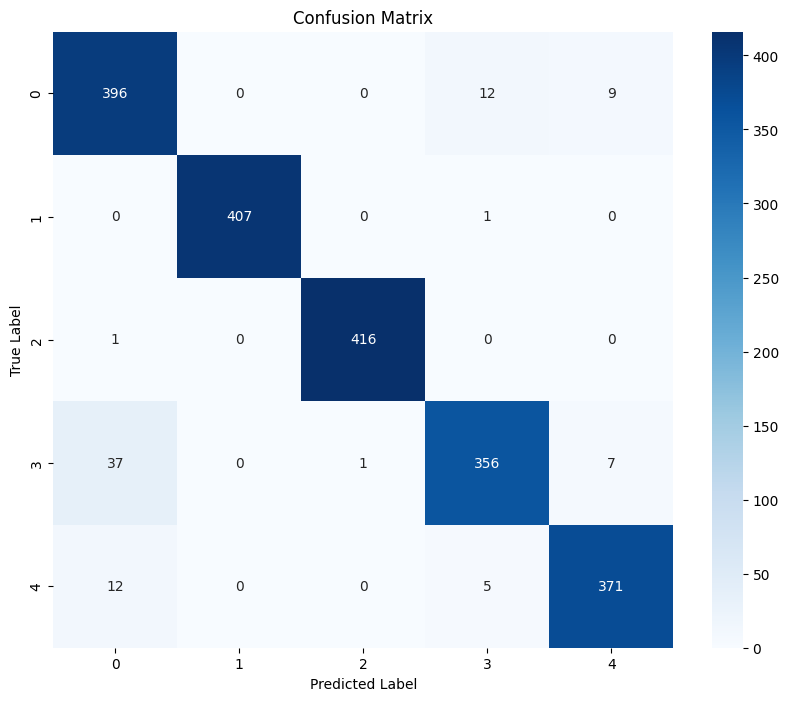

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ========================
# Compute confusion matrix
# ========================
cm = confusion_matrix(y_true, y_pred)

# If dataset has class names
if hasattr(train_dataset, "classes"):
    class_names = train_dataset.classes
else:
    class_names = [str(i) for i in range(len(np.unique(y_true)))]

# ========================
# Plot confusion matrix
# ========================
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


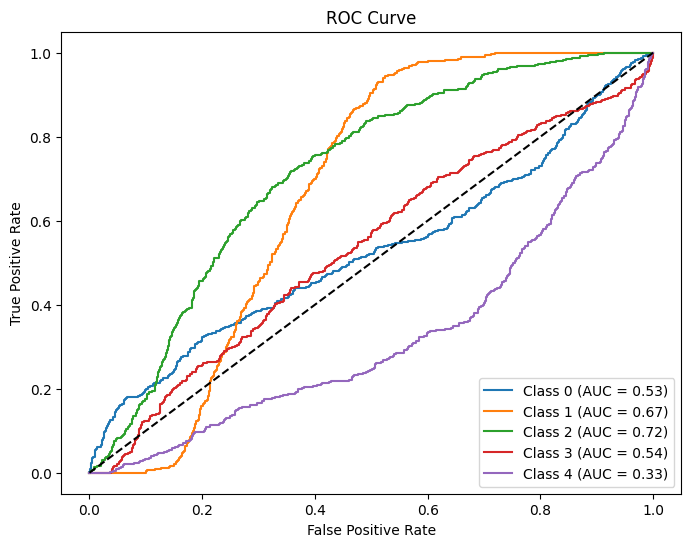

In [42]:
# ROC Curve & AUC
# ==========================
#Collect both y_true and y_score
from sklearn.metrics import roc_curve, auc
import numpy as np

y_true = []
y_score = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)   # raw logits
        probs = torch.softmax(outputs, dim=1)  # convert to probabilities

        y_true.extend(labels.cpu().numpy())
        y_score.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_score = np.array(y_score)

#Plot ROC curves
# One-hot encode the labels
y_true_bin = np.eye(len(np.unique(y_true)))[y_true]

fpr, tpr, roc_auc = {}, {}, {}

for i in range(y_true_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(y_true_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [59]:
#  Measure Testing Time
# =========================
start_test = time.time()
model_finetune.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_finetune(images)
end_test = time.time()
testing_time = end_test - start_test
print(f"Total Testing Time: {testing_time:.2f} seconds")

Total Testing Time: 39.34 seconds


In [60]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import numpy as np # Import numpy
import torch.nn.functional as F # Import functional

# Calculate metrics
overall_acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Ensure y_score is a numpy array
y_score_np = np.array(y_score)

# Check if y_score_np needs softmax (if it's not already probabilities for 5 classes)
# This is a workaround - the intended fix is to run cell Jde846WPm78H which applies softmax
if y_score_np.shape[1] != len(np.unique(y_true)) or not np.allclose(y_score_np.sum(axis=1), 1):
    print("Applying softmax to y_score within UCuVvpdU0qP7 as a workaround.")
    # Assuming y_score contains logits if it's not already probabilities
    y_score_tensor = torch.tensor(y_score_np)
    y_score_np = F.softmax(y_score_tensor, dim=1).numpy()


# IMPORTANT: Make sure you run the cell that collects y_true, y_pred, and y_score
# (cell ID Jde846WPm78H) BEFORE running this cell, as that cell applies softmax
# to get probabilities for y_score which are needed for roc_auc_score.
auc_score = roc_auc_score(y_true_bin, y_score_np, average='weighted', multi_class='ovr')


# Create summary dictionary
results = {
    "Model": ["SimCLR"],
    "Accuracy": [overall_acc],
    "Precision": [precision],
    "Recall": [recall],
    "F1-score": [f1],
    "AUC": [auc_score],
    "Training Time (s)": [training_time],
    "Testing Time (s)": [testing_time]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

print(" Performance Summary:")
display(results_df)

 Performance Summary:


,Model,Accuracy,Precision,Recall,F1-score,AUC,Training Time (s),Testing Time (s)
0,SimCLR,0.958149,0.959089,0.958149,0.958185,0.997467,0.000035,39.339217


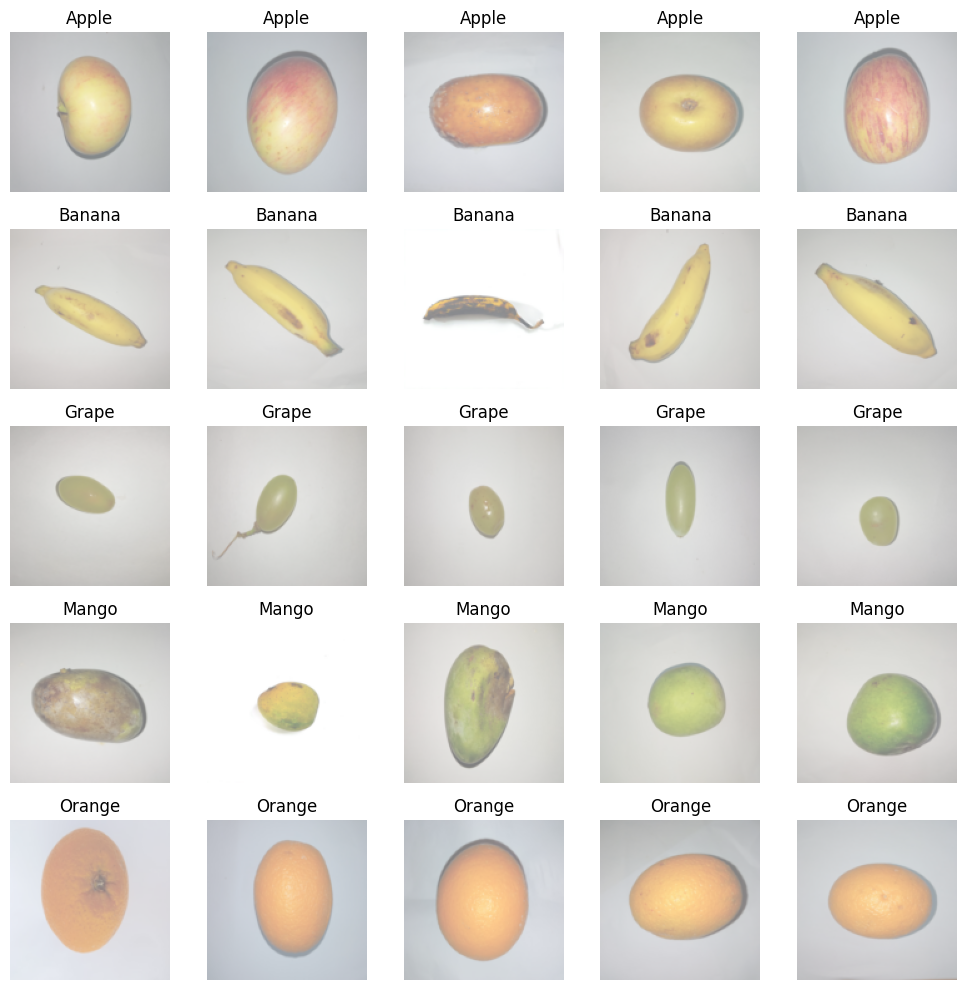

In [61]:
# Visualize a Sample Images Per Class
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have your dataset as (images, labels) or a DataLoader
# Example: train_dataset, train_loader

# Class names (change these if using a different dataset)
# class_names = train_dataset.classes  # works if dataset is torchvision.datasets
# OR manually set: class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = dataset_labeled.classes # Get class names from the original dataset

def imshow(img, ax):
    img = img / 2 + 0.5     # unnormalize if normalized
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))

# Show a few sample images per class
num_classes = len(class_names)
samples_per_class = 5  # how many per class to show

fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(samples_per_class*2, num_classes*2))

# Dictionary to track collected samples
collected = {cls:0 for cls in range(num_classes)}

for img, label in train_dataset:
    if all(v >= samples_per_class for v in collected.values()):
        break
    if collected[label] < samples_per_class:
        ax = axes[label, collected[label]]
        imshow(img, ax)
        ax.set_title(class_names[label])
        ax.axis('off')
        collected[label] += 1

plt.tight_layout()
plt.show()

In [62]:
# Collect true labels and predictions
y_true = []
y_pred = []
y_score = [] # To store prediction probabilities for ROC AUC

model_finetune.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_finetune(images)
        _, predicted = outputs.max(1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        # Apply softmax to get probabilities before appending
        probs = torch.softmax(outputs, dim=1)
        y_score.extend(probs.cpu().numpy())